# Manufactures, Structural Transformation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from enclose import *
from scipy.optimize import fsolve

## Introduction

These nootes show how to extend the model of land enclosures to add a non-agricultural "manufacturing" sector and study structural transformation questions.

## A model of enclosures

As before, a population of $\bar L$ agents inelastically supplies labor $\bar L$ to the economy. The total supply of land is $\bar T$, with $T_e$ denoting enclosed land.  $t_e=\frac{T_e}{\bar T}$ is the share of land enclosed.

Laborers can now move between manufacturing and agriculture, and within agriculture between the unenclosed and enclosed sectors. In equilibrium, labor moves until the competitive market wage $w$ it can earn in the "enclosed production" and/or in the manufacturing sectors is also equal to the value average product of (local wage plus land rents) the same labor could earn in the unenclosed sector.

Production on enclosed and unenclosed production sites employs land $T$ and labor $L$ with the following homogenous of degree 1 Cobb-Douglas production technologies:

|                                    |                       |
|:-----------------------------------|:------------------| 
| $p \cdot \theta_M \cdot G(K,L)= {K}^{1-\beta}\cdot L^\beta$  |  Production technology in the manufacturing sector |     
| $F(T,L)= {T}^{1-\alpha}\cdot L^\alpha$  |  Production technology in unenclosed agriculture sector |
| $\theta \cdot F(T,L)$  |  Production technology in the enclosed agriculture sector|

In equilibrium, the labor market clears:

$$
L_e + L_u = 1 - L_m
$$

or

$$
l_e + l_u = 1 - l_m
$$

Production in the manufacturing sector thus be expressed in terms of potential output in the sector as: 

$$
p \cdot \theta_M \cdot l_m^\beta \cdot G(\bar K, \bar L)
$$

because $L_M = l_m \bar L$ and $K_m$. The marginal products of labor (MPL_i) in sector $i \in \{m, e, u\}$ can then be written:

$$
MPL_m = 
\beta \cdot \left ( \frac{1}{l_m} \right ) ^{1-\beta} \cdot  \bar k^{1-\beta}
$$

$$
MPL_e = 
 \alpha \cdot \theta \cdot \left ( \frac{t_e}{l_e} \right ) ^{1-\alpha} \cdot \bar t^{1-\alpha}
$$


Average product of labor in unenclosed agriculture is:
$$
\begin{aligned}
APL_u &= \frac{F(t_u, l_u)}{l_e} \cdot \frac{F(\bar T, \bar L)}{\bar L} \\
   &=  \left ( \frac{1-t_e}{1-l_m-l_e} \right ) ^{1-\alpha} \cdot  \bar t^{1-\alpha}
\end{aligned}
$$

Note that for our Cobb-Douglas production $MPL_u = \alpha APL_u$ 

**Labor allocation as a function of the enclosure rate $t_e$** 

Suppose share $t_e$ of agricultural land has been enclosed. Workers will move across sectors (from agriculture to manufacturing) or from the enclosed to the unenclosed agricultural sectors until:

$$
w = p \cdot MPL_m = MPL_e = APL_u
$$

Let's focus on the last equality first. Simplifying:

$$
(\alpha \theta)^\frac{1}{1-\alpha} \left ( \frac{t_e}{l_e}   \right ) 
= \left ( \frac{1-t_e}{(1-l_m)-l_e} \right )  
$$

and solving for labor allocations as a function of $t_e$:

$$
l_e^*(t_e) = \frac{\Lambda t_e }{(1-t_e+\Lambda t_e)} \cdot (1-l_m)
$$

where  $\Lambda = (\alpha \theta )^{\frac{1}{1-\alpha}}$ 

These expressions are very similar to what we derived for the agriculture-only economy except that now $(1-l_m)$ replaces $1$.

Using this expression for $l_e$ for any level of enclosure $t_e$ and $l_m$ we can find an expression for the rural 'wage' 

$$
\begin{aligned}
w(t_e)^* &=  \bar t^ {1-\alpha} \cdot \left ( \frac{t_e}{l_e(t_e)^*} \right ) ^{1-\alpha}  \\
 &=  \bar t^ {1-\alpha} \cdot (1-t_e+\Lambda t_e) ^{1-\alpha} \cdot \left (\frac{1}{1-l_m} \right )^{1-\alpha}  
\end{aligned}
$$

As expected, when $t_e=1$ we get $w = \alpha \theta \cdot \bar t^{1-\alpha}$ and when $t_e=0$ instead $w=\bar t^{1-\alpha}$.

The equilibrium labor share to manufacturing that equalizes returns to workers across sectors is given by:

$$
p \cdot \beta \bar k ^{1-\beta} \left (\frac{1}{l_m}   \right )^{1-\beta}  
= \bar t^ {1-\alpha} \cdot  (1-t_e+\Lambda t_e) ^{1-\alpha}  \cdot \left (\frac{1}{1-l_m} \right )^{1-\alpha}
$$

We can think of this as an augmented specific factors model, mobile labor, capital specific to the manufacturing sector, and land specific to agriculture, but with the twist that land may be enclosed or unenclosed, which can affect labor demands. The market clears at a labor market allocation $l_m$ when the value marginal product of a labor (or labor demand) in manufacturing is equal to the market equilibrium wage $w$ which in turn equals a enclosure-rate weighted average of marginal value product of labor on enclosed lands and average value product of labor on unenclosed lands.  Raising each side of the above to the power of $\frac{1}{1-\alpha}$:



$$
(p \cdot \beta)^\frac{1}{1-\alpha} \bar k ^\frac{1-\beta}{1-\alpha} \left (1-l_m   \right )  
= \bar t \cdot  (1-t_e+\Lambda t_e)   \cdot l_m ^\frac{1-\beta}{1-\alpha}
$$

## Plotting the equilibrium

The `weq` function takes labor supply as an input.  Without manufacturing, it's $\bar t = \frac{\bar T}{\bar L}$ but in the adapted case here it's just

In [39]:
def mplm(lm, p=1, kb= 1, b=0.5):
    C = (p*b) * kb**(1-b)
    return C * (1/lm)**(1-b)

def mapla(lm, te, tb = 1, a=0.5, th=1):
    """labor demand in agriculture... weighted avg"""
    Lambda = (a*th)**(1/(1-a))
    C = tb**(1-a) *  (1 + (Lambda-1)*te)**(1-a) 
    return C * (1/(1-lm))**(1-a)


def pl(te, th=1, p=1, kb= 1,  a=0.5, b=0.5, tb=1):
    lm = np.linspace(0,1,100)
    plt.plot(lm, mplm(lm, p, kb, b))
    plt.plot(lm, mapla(lm, te, tb, a, th))
    plt.grid()
    plt.xlim(0,1)
    plt.ylim(0,2)
    def f(m):
        return  mplm(m, p, kb, b) - mapla(m, te, tb, a, th)
    lme = fsolve(f,[0.01, 0.99])[1]
    wme = mapla(lme,te, tb, a, th)
    print(f'lme = {lme: 0.2f}, wme = {wme:0.2f}')
    plt.scatter(lme, wme)
    plt.scatter(lme, 0)
    plt.vlines(lme, 0, wme)

## The effect of enclosure on structural transformation

Here we show that enclosures can have an important effect on structural transformation, though we do not yet solve for the equilibrium level of enclosures.

Here is an economy without any enclosure. About 20 percent of the population is in manufacturing.

lme =  0.20, wme = 1.14


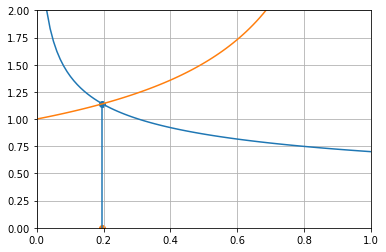

In [40]:
pl(te=0, th=1, p=1, kb= 1,  a=0.4, b=0.7, tb=1)

Now consider the same economy, with the only difference that land is completely enclosed, so $t_e=1$.  Notice that in this economy $\theta=1$ so enclosure does not raise plot level TFP.

Notice that the labor share in manufacturing rises dramatically to almost 70 percent, but we end up with a significantly lower equilibrium wage (the Weitzman/Samuelson effect).

lme =  0.68, wme = 0.79


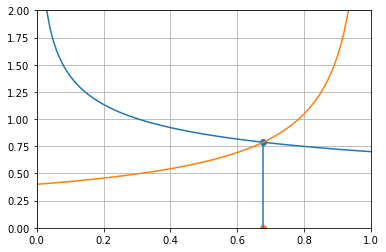

In [41]:
pl(te=1, th=1, p=1, kb= 1,  a=0.4, b=0.7, tb=1)

The same diagram with interactive sliders to change parameters:

In [42]:
interact(pl, te=(0,1,0.1), th=(0.9, 3,0.1), p = (0.5,2,0.1), tb=(0.5,2,0.1));

interactive(children=(FloatSlider(value=0.0, description='te', max=1.0), FloatSlider(value=1.0, description='t…

We have not yet specified a cost to enclosure. If enclosure were costless, and $\theta \ge 1$ then it would always be worthwhile to enclose. If enclosure is costly we need to compare social benefits to social costs.

## Socially optimal enclosure

The planner wants to choose $(T_e, L_e, L_m)$ to maximize:


$$
\theta F(T_e, L_e) +  F(\bar T - T_e, \bar L - L_m - L_e)  + p \cdot G(\bar K, L_m) - c \cdot T_e
$$




To be continued...